# Predicting Insurance Premium 

By using Machine Learning I try to predict the policy premiums for the insured based on their age, sex, BMI, smoking habits and whether they have children or not. 

This dataset contains 1338 records and 7 features. Dataset is downloaded from raw.githubusercontent.com website.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


In [3]:
file_name='http://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/insurance.csv'

In [59]:
insurance=pd.read_csv(file_name)


In [60]:
insurance.shape

(1338, 7)

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
 insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
insurance.isnull().sum().values.sum()

0

# Exploratary Data Analysis

I use exploratary data analysis to analyse and investigate the dataset and summarize their main characteristics. This will help me to discover patterns, spot anomalies and correlations in the dataset.

In [9]:
corr=insurance.corr()

In [10]:
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

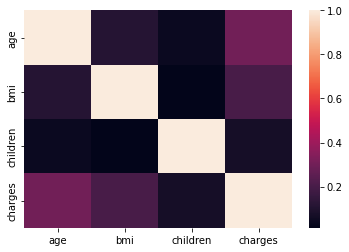

In [11]:
sns.heatmap(corr)

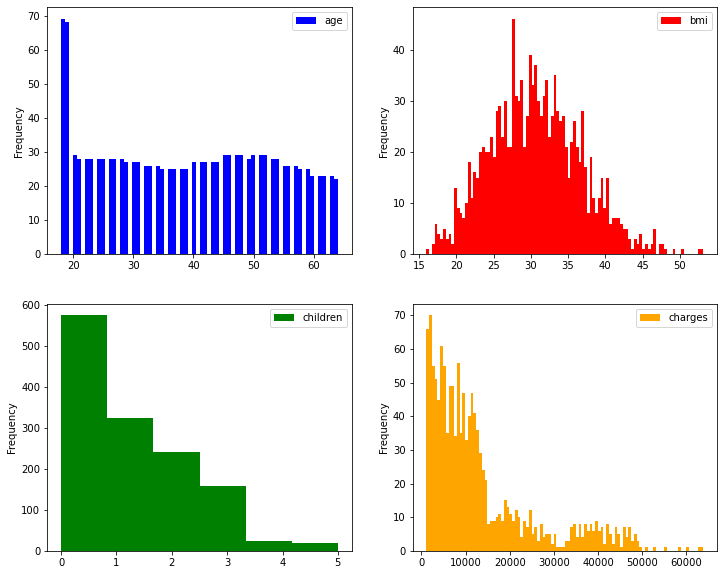

In [12]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,10))
insurance.plot(kind='hist',y='age',bins=70,color='b',ax=axes[0][0])
insurance.plot(kind='hist',y='bmi',bins=100,color='r',ax=axes[0][1])
insurance.plot(kind='hist',y='children',bins=6,color='g',ax=axes[1][0])
insurance.plot(kind='hist',y='charges',bins=100,color='orange',ax=axes[1][1])
plt.show()

<AxesSubplot:>

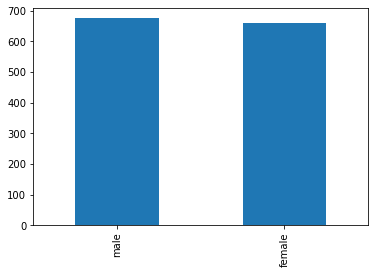

In [13]:
insurance['sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

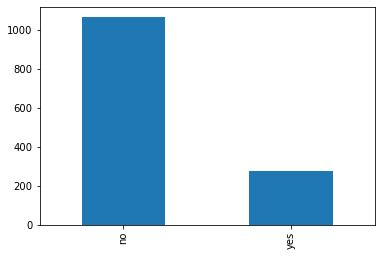

In [14]:
insurance['smoker'].value_counts().plot(kind='bar')

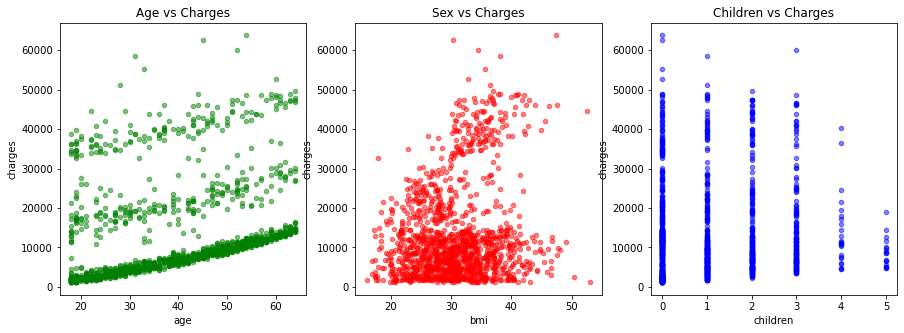

In [15]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
insurance.plot(kind='scatter',x='age',y='charges',alpha=0.5,color='green',ax=axes[0],title='Age vs Charges')
insurance.plot(kind='scatter',x='bmi',y='charges',alpha=0.5,color='red',ax=axes[1],title='Sex vs Charges')
insurance.plot(kind='scatter',x='children',y='charges',alpha=0.5,color='blue',ax=axes[2],title='Children vs Charges')
plt.show()


<AxesSubplot:xlabel='bmi', ylabel='charges'>

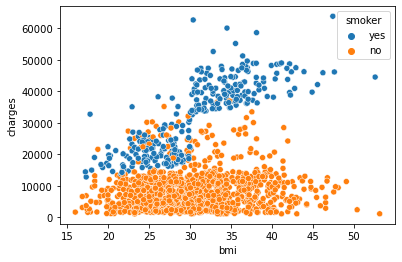

In [27]:
pal=['#FA585','#58D3F7']
sns.scatterplot(x='bmi',y='charges',data=insurance, hue='smoker')

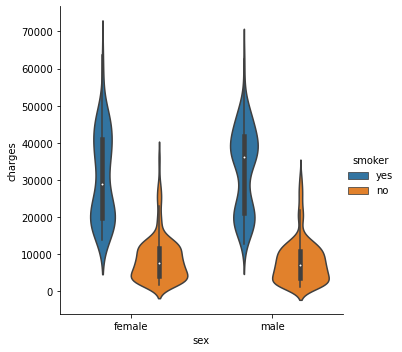

In [21]:
sns.catplot(x='sex',y='charges',hue='smoker',kind='violin',data=insurance)

Text(0.5, 1.0, 'Smokers')

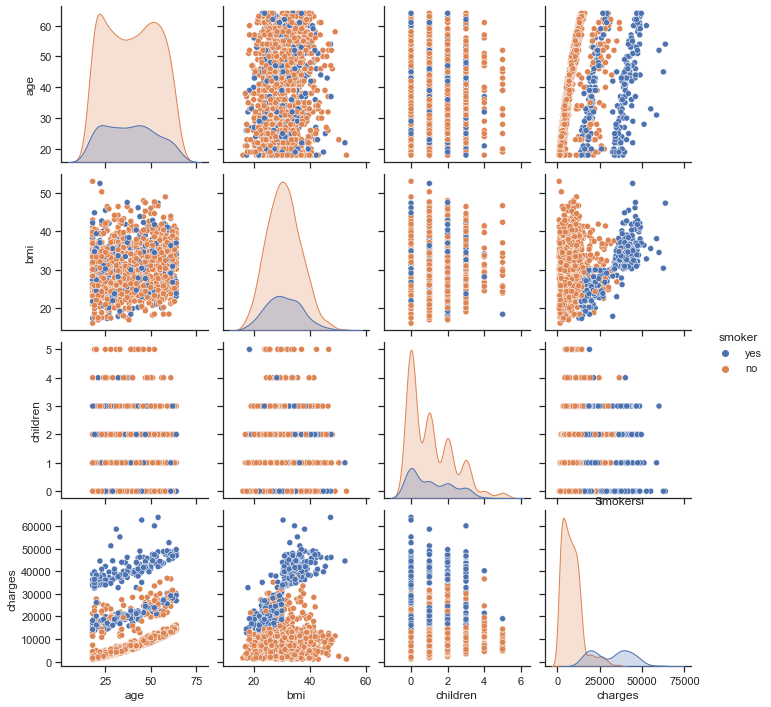

In [29]:
sns.set(style='ticks')
sns.pairplot(insurance,hue='smoker')
plt.title('Smokers')

# Preparing Data for Machine Learning Algorithm

In the data preparation step, 2 columns that have binary values ('sex','smoker') need to be converted into numerical values.

In [30]:
insurance.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Let's remove the 'region' feature for now.

In [32]:
insurance.drop(['region'],axis=1,inplace=True)

In [34]:
le=LabelEncoder()

In [35]:
insurance[['sex','smoker']]=insurance[['sex','smoker']].apply(lambda col:le.fit_transform(col))

In [36]:
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [37]:
X=insurance.drop(['charges'],axis=1)
y=insurance.charges

# Modeling the Data


In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

lr=LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [39]:
y_train_pred=lr.predict(X_test)

In [40]:
print(lr.score(X_test,y_test))

0.7952171980481992


Normalizing the data

In [48]:

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [46]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,-0.514853,-0.985155,-0.181331,-0.063607,-0.503736
1,1.548746,-0.985155,-1.393130,-0.892144,-0.503736
2,-1.439915,1.015069,-0.982242,-0.063607,-0.503736
3,-1.368757,-0.985155,-1.011133,-0.892144,1.985167
4,-0.941805,-0.985155,-1.362635,-0.892144,-0.503736


In [50]:
pd.DataFrame(y_train).head()

,charges
1075,4562.84210
131,13616.35860
15,1837.23700
1223,26125.67477
1137,3176.28770


In [51]:

decision_tree_reg = DecisionTreeRegressor(max_depth=5,random_state=1)
decision_tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=1)

In [56]:
#Prediction with training dataset
y_pred_dt_train=decision_tree_reg.predict(X_train)

#Prediction with testing dataset
y_pred_dt_test=decision_tree_reg.predict(X_test)

# Training accuracy for the model
accuracy_dt_train=r2_score(y_train,y_pred_dt_train)

#Testing accuracy for the model
accuracy_dt_test=r2_score(y_test,y_pred_dt_test)

In [57]:
print('Training Accuracy for Decision Tree Regression Model :',accuracy_dt_train)
print('Testing Accuracy for Decision Tree Regression Model :',accuracy_dt_test)

Training Accuracy for Decision Tree Regression Model : 0.8694256791947466
Testing Accuracy for Decision Tree Regression Model : 0.8699569522929271
